In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import networkx as nx
%matplotlib inline

In [42]:
df = pd.read_csv('merged.csv')
df.head()

,name,rep,H.period,H.t,DD.period.t,UD.period.t,H.i,DD.t.i,UD.t.i,H.e,...,DD.o.n,UD.o.n,H.a,DD.n.a,UD.n.a,H.l,DD.a.l,UD.a.l,backspaces,caps_lock
0,jauri,1,0.092790,0.090883,0.246703,0.337586,0.087738,0.153798,0.241535,0.087737,...,0.056452,0.229154,0.154004,0.218646,0.372650,0.096280,0.171825,0.268105,0,0
1,jauri,2,0.087310,0.085243,0.304038,0.389281,0.097292,0.217083,0.314374,0.102547,...,0.061247,0.225106,0.101477,0.194049,0.295526,0.101519,0.224497,0.326015,0,0
2,jauri,3,0.130960,0.086942,0.329384,0.416326,0.093535,0.090715,0.184250,0.086722,...,0.144304,0.252867,0.176790,0.134659,0.311448,0.098133,0.156365,0.254498,0,0
3,jauri,4,0.140503,0.074106,0.361985,0.436090,0.094165,1.971756,2.065921,0.109514,...,0.126976,0.255856,0.124415,0.244116,0.368531,0.084438,0.282270,0.366708,0,0
4,jauri,5,0.147327,0.077649,0.291591,0.369241,0.109658,0.166732,0.276390,0.119945,...,0.096402,0.246673,0.154400,0.194311,0.348711,0.131821,0.163093,0.294914,0,0


In [43]:
subjects = df['name'].unique()

In [44]:
subjects_to_int = {subject: i  for i, subject in enumerate(subjects)}
int_to_subjects = {i: subject for i, subject in enumerate(subjects)}

In [45]:
df = df.replace(subjects_to_int)

C:\Users\skhim\AppData\Local\Temp\ipykernel_31736\1725018810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(subjects_to_int)


In [46]:
df.head()

,name,rep,H.period,H.t,DD.period.t,UD.period.t,H.i,DD.t.i,UD.t.i,H.e,...,DD.o.n,UD.o.n,H.a,DD.n.a,UD.n.a,H.l,DD.a.l,UD.a.l,backspaces,caps_lock
0,0,1,0.092790,0.090883,0.246703,0.337586,0.087738,0.153798,0.241535,0.087737,...,0.056452,0.229154,0.154004,0.218646,0.372650,0.096280,0.171825,0.268105,0,0
1,0,2,0.087310,0.085243,0.304038,0.389281,0.097292,0.217083,0.314374,0.102547,...,0.061247,0.225106,0.101477,0.194049,0.295526,0.101519,0.224497,0.326015,0,0
2,0,3,0.130960,0.086942,0.329384,0.416326,0.093535,0.090715,0.184250,0.086722,...,0.144304,0.252867,0.176790,0.134659,0.311448,0.098133,0.156365,0.254498,0,0
3,0,4,0.140503,0.074106,0.361985,0.436090,0.094165,1.971756,2.065921,0.109514,...,0.126976,0.255856,0.124415,0.244116,0.368531,0.084438,0.282270,0.366708,0,0
4,0,5,0.147327,0.077649,0.291591,0.369241,0.109658,0.166732,0.276390,0.119945,...,0.096402,0.246673,0.154400,0.194311,0.348711,0.131821,0.163093,0.294914,0,0


In [47]:
data_raw = df.values
print(data_raw)
data_raw.shape

[[ 0.          1.          0.09279013 ...  0.26810479  0.
   0.        ]
 [ 0.          2.          0.08730984 ...  0.32601547  0.
   0.        ]
 [ 0.          3.          0.13095999 ...  0.25449801  0.
   0.        ]
 ...
 [ 3.          8.          0.07643366 ...  0.31427527  0.
   2.        ]
 [ 3.          9.          0.0811522  ...  0.28283095  0.
   2.        ]
 [ 3.         10.          0.06935549 ...  0.28545785  0.
   2.        ]]


(210, 32)

In [48]:
data=data_raw[ :, 2:]
labels_raw = df['name'].values
labels= labels_raw.reshape(labels_raw.shape[0],1)
data=np.hstack([data, labels])
print(data)

[[0.09279013 0.09088349 0.24670267 ... 0.         0.         0.        ]
 [0.08730984 0.08524323 0.30403805 ... 0.         0.         0.        ]
 [0.13095999 0.08694196 0.32938385 ... 0.         0.         0.        ]
 ...
 [0.07643366 0.06415033 0.25652361 ... 0.         2.         3.        ]
 [0.0811522  0.04557419 0.29244423 ... 0.         2.         3.        ]
 [0.06935549 0.07601428 0.26608658 ... 0.         2.         3.        ]]


In [9]:
np.random.shuffle(data)
x=data[ : , :-1]
y=data[:,-1]
x.shape

(210, 30)

In [49]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [51]:
Y_train = to_categorical(y_train, num_classes=4)
Y_test=to_categorical(y_test,num_classes=4)


In [52]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(189, 30, 1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# rnn = Sequential()
# rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# rnn.add(Dropout(0.2))
# for i in [True, True, False]:
#     rnn.add(LSTM(units = 45, return_sequences = i))
#     rnn.add(Dropout(0.2))
# rnn.add(Dense(units = 51, activation='softmax', name='output_layer'))

In [54]:
rnn = Sequential()
for i in [True, True, False]:
    rnn.add(LSTM(units = 45, return_sequences = i))
    rnn.add(Dropout(0.2))
rnn.add(Dense(units = 4, activation='softmax'))

In [55]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.1)
opt = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999)

In [56]:
rnn.compile(optimizer = opt, loss = 'categorical_crossentropy')

Epoch 1/60
6/6 [==============================] - 6s 198ms/step - loss: 1.3442 - val_loss: 1.2999
Epoch 2/60
6/6 [==============================] - 0s 39ms/step - loss: 1.2786 - val_loss: 1.2895
Epoch 3/60
6/6 [==============================] - 0s 37ms/step - loss: 1.2382 - val_loss: 1.1771
Epoch 4/60
6/6 [==============================] - 0s 41ms/step - loss: 1.2847 - val_loss: 1.3114
Epoch 5/60
6/6 [==============================] - 0s 37ms/step - loss: 1.2449 - val_loss: 1.3354
Epoch 6/60
6/6 [==============================] - 0s 37ms/step - loss: 1.2365 - val_loss: 1.3511
Epoch 7/60
6/6 [==============================] - 0s 31ms/step - loss: 1.1598 - val_loss: 1.0080
Epoch 8/60
6/6 [==============================] - 0s 31ms/step - loss: 0.9848 - val_loss: 0.7096
Epoch 9/60
6/6 [==============================] - 0s 34ms/step - loss: 0.8159 - val_loss: 0.6738
Epoch 10/60
6/6 [==============================] - 1s 99ms/step - loss: 1.2698 - val_loss: 1.3630
Epoch 11/60
6/6 [===========

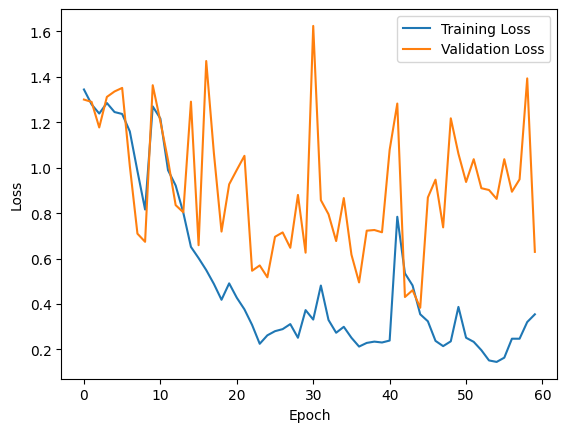

In [57]:
history= rnn.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs = 60, batch_size=32)

# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
rnn.save('rnn_weights.h5')

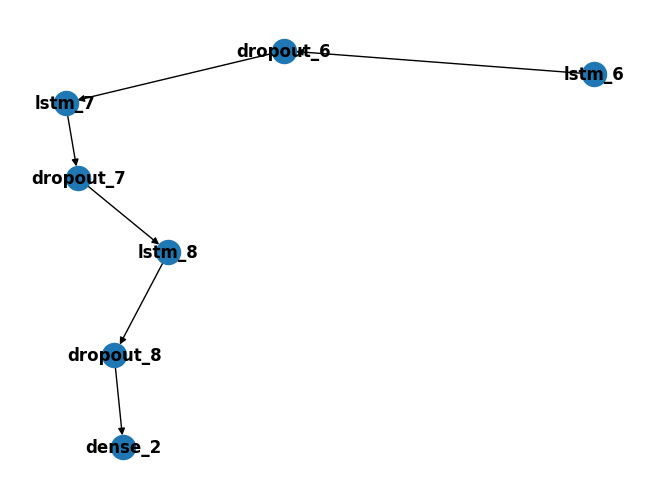

In [58]:
G = nx.DiGraph()  # Create a directed graph

for layer in rnn.layers:
    G.add_node(layer.name)

# Add edges (connections)
for i in range(len(rnn.layers) - 1):
    G.add_edge(rnn.layers[i].name, rnn.layers[i + 1].name)

# Customize layout and display
pos = nx.spring_layout(G)  # Choose a layout algorithm
nx.draw(G, pos, with_labels=True, font_weight="bold")
plt.show()


In [59]:
print(X_test.shape)
predictions_prob= rnn.predict(X_test)
y_pred=[np.argmax(i) for i in predictions_prob]
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

(21, 30, 1)
1/1 [==============================] - 1s 971ms/step
[2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2]
[2. 2. 2. 0. 2. 3. 0. 0. 2. 0. 0. 0. 2. 2. 1. 1. 2. 2. 1. 2. 2.]
0.8095238095238095


In [ ]:
rnn.save('LSTM.keras') 